# HACKEREARTH DEEP LEARNING CHALLENGE

# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Training and Test Data

In [3]:
df_train=pd.read_csv("train.csv")

In [4]:
df_train.head()


,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [5]:
df_test=pd.read_csv("test.csv")

In [6]:
#Check How many Unique Values Are Present
df_train["target"].nunique()
#We Can See That 8 Categories Are Present

8

In [7]:
df_test.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


# Importing The Deep Learning Libraries

In [5]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dropout

Using TensorFlow backend.


# NOW LETS CHECK THE SHAPE AND SIZE OF THE INPUT IMAGE

In [7]:
from PIL import Image

In [9]:
im1=Image.open('train/419.jpg')

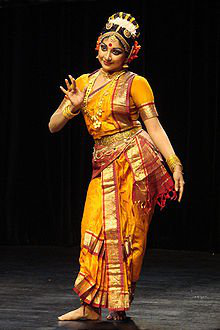

In [10]:
im1

In [11]:
im_array=np.array(im1)

In [12]:
im_array.shape

(330, 220, 3)

# LOAD ANOTHER RANDOM IMAGE


In [13]:
im2=Image.open('train/4.jpg')

In [14]:
im2_array=np.array(im2)

In [15]:
# WE CAN SEE THAT ALL IMAGES ARE NOT OF EQUAL DIMGENSION
im2_array.shape

(267, 189, 3)

# This is How We Will resize Our Image
# I am Using I3 Processsor So I am Resizing The Image To (64,64)
# You Can Resize It higher Dimension Such As (128,128)

In [16]:
im1=im1.resize(size=(64,64))

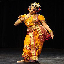

In [17]:
im1

# LETS PREPROCESS OUR DATASET NOW

In [18]:
#Checking The Shape Of Dataset
df_train.shape[0]

364

In [19]:
for i in range(df_train.shape[0]):
    k=df_train["Image"][i]
    df_train["Image"][i]=Image.open('train/{}'.format(k))
    df_train["Image"][i]=df_train["Image"][i].resize((64,64))
    

# We Have Resized Our Training Images

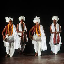

In [20]:
df_train["Image"][0]

# CONVERTING OUR INPUT SHAPE TO PIXEL FORMAT

In [22]:
for i in range(df_train.shape[0]):
    k=df_train["Image"][i]
    df_train["Image"][i]=np.array(k)
    

In [23]:
df_train.head()

,Image,target
0,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",manipuri
1,"[[[9, 8, 16], [11, 10, 18], [14, 13, 21], [18,...",bharatanatyam
2,"[[[20, 16, 13], [21, 17, 14], [21, 17, 14], [2...",odissi
3,"[[[25, 19, 5], [27, 21, 7], [25, 19, 5], [25, ...",kathakali
4,"[[[0, 0, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1], ...",odissi


In [ ]:
#CONVERTING OUR INPUT SHAPE TO PIXEL FORMAT

In [24]:
df_train["Image"][65].shape

(64, 64, 3)

# Here We Can See The Dimension Of Our Input Image 
# Here (64,64) Are The Height And Width Of Image And 3 Stands For Coloured Picture(RGB).

In [ ]:
#SAVE THIS PREPROCESSED DATASET INTO ANOTHER CSV FOR FUTURE PURPOSE


In [25]:
df_train.to_csv("Preprocessed.csv",index=False)

# WE HAVE PREPROCESSED OUR DATA

# LETS RESHAPE THEM INTO 4D TENSORS AS THEY REQUIRED FOR INPUT IN KERAS

In [26]:
y_train=df_train["target"]

In [27]:
y_train

0           manipuri
1      bharatanatyam
2             odissi
3          kathakali
4             odissi
5             kathak
6           sattriya
7          kuchipudi
8           sattriya
9          kuchipudi
10         kuchipudi
11         kuchipudi
12            kathak
13          sattriya
14         kathakali
15            odissi
16          sattriya
17         kuchipudi
18          manipuri
19            kathak
20          manipuri
21     bharatanatyam
22         kuchipudi
23         kuchipudi
24      mohiniyattam
25            odissi
26            kathak
27            odissi
28            odissi
29          sattriya
           ...      
334           kathak
335     mohiniyattam
336         manipuri
337    bharatanatyam
338     mohiniyattam
339           odissi
340        kathakali
341           odissi
342         manipuri
343        kuchipudi
344           odissi
345    bharatanatyam
346         manipuri
347           kathak
348     mohiniyattam
349           kathak
350        ku

In [46]:
X_train=df_train["Image"]

In [47]:
print(type(X_train))

<class 'pandas.core.series.Series'>


In [48]:
for i in range(df_train["Image"].shape[0]):
    X_train[i]=X_train[i].reshape(1,64,64,3)

# DEFINING THE MODEL

In [50]:
clf=Sequential()

In [51]:
clf.add(Conv2D(64,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))
clf.add(MaxPool2D(pool_size=(2,2)))
clf.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
clf.add(MaxPool2D(2,2))
clf.add(Flatten())
clf.add(Dense(units=128,activation='relu'))
clf.add(Dropout(rate=0.2))
clf.add(Dense(8,activation='softmax'))

In [52]:
clf.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [53]:
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Making X_train and y_train as reauired for our Classifier

In [38]:
from sklearn.preprocessing  import LabelEncoder
lb=LabelEncoder()


In [41]:
y_train_scaled=lb.fit_transform(y_train_scaled)

In [36]:
y_train

array([4, 0, 6, 2, 6, 1, 7, 3, 7, 3, 3, 3, 1, 7, 2, 6, 7, 3, 4, 1, 4, 0,
       3, 3, 5, 6, 1, 6, 6, 7, 2, 1, 2, 7, 0, 1, 0, 2, 6, 6, 6, 3, 4, 5,
       5, 6, 1, 4, 1, 5, 6, 7, 7, 6, 3, 7, 5, 4, 7, 1, 6, 7, 4, 2, 7, 2,
       4, 0, 1, 1, 7, 0, 2, 1, 5, 4, 1, 3, 6, 3, 0, 3, 0, 7, 1, 3, 5, 4,
       5, 0, 6, 3, 6, 3, 0, 5, 0, 0, 7, 1, 2, 5, 7, 0, 6, 1, 7, 7, 3, 6,
       1, 4, 2, 0, 5, 2, 3, 4, 5, 0, 5, 1, 2, 3, 0, 5, 0, 5, 2, 0, 5, 0,
       4, 4, 7, 5, 7, 0, 6, 5, 6, 5, 2, 6, 7, 0, 5, 6, 7, 4, 7, 7, 1, 6,
       2, 0, 5, 1, 3, 4, 7, 2, 5, 2, 1, 7, 5, 0, 0, 3, 6, 1, 6, 3, 5, 3,
       6, 7, 0, 0, 2, 6, 5, 4, 6, 2, 5, 5, 3, 1, 5, 4, 6, 6, 3, 2, 0, 2,
       5, 0, 2, 5, 6, 4, 3, 0, 7, 3, 2, 5, 2, 7, 5, 1, 3, 5, 3, 7, 5, 1,
       5, 7, 6, 1, 1, 2, 5, 5, 7, 1, 0, 1, 4, 2, 7, 4, 3, 4, 1, 0, 1, 3,
       2, 2, 6, 3, 0, 2, 3, 2, 6, 0, 7, 7, 1, 0, 6, 7, 0, 6, 7, 5, 2, 2,
       3, 3, 6, 4, 6, 7, 1, 6, 4, 0, 3, 0, 7, 5, 4, 0, 2, 5, 0, 1, 2, 3,
       0, 2, 5, 2, 3, 7, 7, 5, 2, 7, 7, 3, 4, 2, 4,

In [42]:
from keras.utils import to_categorical
y_train_scaled = to_categorical(y_train_scaled)

In [43]:
y_train_scaled.shape

(364, 8)

# NOW VERTCICALLY STACKING UP OUR INPUT ARRAY

In [49]:
X_train[0].shape

(1, 64, 64, 3)

In [50]:
stacked_array=np.vstack((X_train[0],X_train[1]))

In [51]:
stacked_array.shape


(2, 64, 64, 3)

In [52]:
#CONTINUING THIS WORK IN LOOP

In [53]:
for i in range(2,df_train.shape[0]):
    stacked_array=np.vstack((stacked_array,X_train[i]))

In [54]:
stacked_array.shape

(364, 64, 64, 3)

#  We have Processed Out X_train and y_train to Feed them into the network

In [55]:
clf.fit(stacked_array,y_train,epochs=12)

Epoch 1/12
364/364 [==============================] - 4s 10ms/step - loss: 29.1118 - accuracy: 0.1676
Epoch 2/12
364/364 [==============================] - 3s 7ms/step - loss: 1.9777 - accuracy: 0.2582
Epoch 3/12
364/364 [==============================] - 2s 7ms/step - loss: 1.6763 - accuracy: 0.4396
Epoch 4/12
364/364 [==============================] - 3s 7ms/step - loss: 1.1785 - accuracy: 0.6126
Epoch 5/12
364/364 [==============================] - 3s 8ms/step - loss: 0.7365 - accuracy: 0.7500
Epoch 6/12
364/364 [==============================] - 3s 7ms/step - loss: 0.4614 - accuracy: 0.8434
Epoch 7/12
364/364 [==============================] - 2s 7ms/step - loss: 0.3264 - accuracy: 0.9011
Epoch 8/12
364/364 [==============================] - 3s 7ms/step - loss: 0.3184 - accuracy: 0.8901
Epoch 9/12
364/364 [==============================] - 3s 7ms/step - loss: 0.2064 - accuracy: 0.9258
Epoch 10/12
364/364 [==============================] - 3s 7ms/step - loss: 0.2069 - accuracy: 0.94

# Checking The Classes

In [88]:
classes=lb.classes_

In [57]:
classes

array(['bharatanatyam', 'kathak', 'kathakali', 'kuchipudi', 'manipuri',
       'mohiniyattam', 'odissi', 'sattriya'], dtype=object)

# NOW MAKING PREDICTIONS

In [58]:
from keras.preprocessing import image
test_image=image.load_img('test/198.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)



In [59]:
clf.predict_classes(test_image)

array([3])

In [60]:
print("The Prediceted Dance Form is {}".format(classes[3]))

The Prediceted Dance Form is kuchipudi


# MAKING SUBMISSION FILE

In [61]:
df_test.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


# Preprocessing The Test File For Making Predictions

In [62]:
for i in range(df_test.shape[0]):
    k=df_test["Image"][i]
    df_test["Image"][i]=Image.open('test/{}'.format(k))
    

In [80]:
df_test["Image"][1]

'246.jpg'

In [68]:
for i in range(df_test.shape[0]):
    k=df_test["Image"][i]
    df_test["Image"][i]=k.resize((64,64))
    

In [81]:
im1=Image.open('test/246.jpg')

In [82]:
df_test["Image"][1]=im1.resize((64,64))

In [83]:
df_test.head()

,Image
0,<PIL.Image.Image image mode=RGB size=64x64 at ...
1,<PIL.Image.Image image mode=RGB size=64x64 at ...
2,<PIL.Image.Image image mode=RGB size=64x64 at ...
3,<PIL.Image.Image image mode=RGB size=64x64 at ...
4,<PIL.Image.Image image mode=RGB size=64x64 at ...


In [84]:
for i in range(df_test.shape[0]):
    k=df_test["Image"][i]
    df_test["Image"][i]=np.array(k)
    

In [85]:
df_test.head()

,Image
0,"[[[2, 0, 13], [2, 0, 13], [2, 1, 9], [2, 1, 6]..."
1,"[[[0, 2, 5], [0, 0, 12], [0, 0, 13], [1, 1, 11..."
2,"[[[1, 3, 0], [1, 3, 0], [1, 3, 0], [1, 3, 0], ..."
3,"[[[1, 0, 0], [0, 1, 0], [0, 2, 0], [0, 0, 0], ..."
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


# Let's Try predict a random image for given dimension


In [86]:
pre=clf.predict_classes(df_test["Image"][23])

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (64, 64, 3)

# WE can see that we need 4 dimenions as we have trained our classifier with 4d

In [87]:
#Changing the dimensions
X_test=df_test["Image"]

In [88]:
for i in range(df_test["Image"].shape[0]):
    X_test[i]=X_test[i].reshape(1,64,64,3)

In [89]:
X_test.to_csv("Preprocessd_test.csv",index=False)

/home/neelesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# Let's Make Predictions


In [ ]:
l=classes[clf.predict_classes(X_test[4]).shape[0]]
# copying the same code in a loop

In [90]:
pred=[]
for i in range(X_test.shape[0]):
    pred.append(classes[clf.predict_classes(X_test[i]).shape[0]])
    

In [91]:
pred

['kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'kathak',

# AS YOU CAN SEE THAT THERE IS SOME SORT OF OVERFIING IN OUR MODEL

# Let's Make Another Classfier

In [46]:
clf2=Sequential()

In [47]:
clf2.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),input_shape=(64,64,3),activation='relu'))

In [48]:

clf2.add(MaxPool2D(pool_size=(2,2)))
clf2.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
clf2.add(MaxPool2D(2,2))
clf2.add(Flatten())
clf2.add(Dense(units=128,activation='relu'))
clf2.add(Dropout(rate=0.2))
clf2.add(Dense(units=64,activation='relu'))
clf2.add(Dropout(0.2))
clf2.add(Dense(8,activation='softmax'))

In [49]:
clf2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [166]:
clf2.fit(stacked_array,y_train,epochs=20)

Epoch 1/20
364/364 [==============================] - 3s 9ms/step - loss: 39.2442 - accuracy: 0.1346
Epoch 2/20
364/364 [==============================] - 2s 4ms/step - loss: 2.2079 - accuracy: 0.2308
Epoch 3/20
364/364 [==============================] - 2s 4ms/step - loss: 1.7664 - accuracy: 0.3407
Epoch 4/20
364/364 [==============================] - 2s 4ms/step - loss: 1.3252 - accuracy: 0.5467
Epoch 5/20
364/364 [==============================] - 2s 4ms/step - loss: 0.7994 - accuracy: 0.7500
Epoch 6/20
364/364 [==============================] - 2s 4ms/step - loss: 0.4778 - accuracy: 0.8434
Epoch 7/20
364/364 [==============================] - 2s 4ms/step - loss: 0.2960 - accuracy: 0.9093
Epoch 8/20
364/364 [==============================] - 2s 4ms/step - loss: 0.2087 - accuracy: 0.9505
Epoch 9/20
364/364 [==============================] - 2s 4ms/step - loss: 0.1851 - accuracy: 0.9478
Epoch 10/20
364/364 [==============================] - 2s 4ms/step - loss: 0.1538 - accuracy: 0.953

In [85]:
#created a dummy file for other purposes
name=pd.read_csv("test.csv")

In [167]:
pred2=[]
for i in range(X_test.shape[0]):
    test_image=image.load_img('test/{}'.format(name["Image"][i]),target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    k=clf2.predict_classes(test_image)
    pred2.append(classes[k[0]])


    
    

In [168]:
pred2

['kathakali',
 'mohiniyattam',
 'kuchipudi',
 'odissi',
 'kathak',
 'kuchipudi',
 'mohiniyattam',
 'odissi',
 'kathak',
 'kuchipudi',
 'bharatanatyam',
 'bharatanatyam',
 'sattriya',
 'bharatanatyam',
 'sattriya',
 'bharatanatyam',
 'odissi',
 'bharatanatyam',
 'mohiniyattam',
 'kuchipudi',
 'odissi',
 'kuchipudi',
 'bharatanatyam',
 'mohiniyattam',
 'mohiniyattam',
 'kathakali',
 'kathak',
 'kathak',
 'kathak',
 'bharatanatyam',
 'sattriya',
 'kuchipudi',
 'manipuri',
 'kuchipudi',
 'kuchipudi',
 'kuchipudi',
 'odissi',
 'odissi',
 'manipuri',
 'bharatanatyam',
 'kathak',
 'bharatanatyam',
 'kuchipudi',
 'manipuri',
 'kuchipudi',
 'mohiniyattam',
 'sattriya',
 'sattriya',
 'kathakali',
 'kuchipudi',
 'kuchipudi',
 'manipuri',
 'kathak',
 'kathak',
 'odissi',
 'kuchipudi',
 'bharatanatyam',
 'odissi',
 'sattriya',
 'kathak',
 'kuchipudi',
 'sattriya',
 'kathak',
 'kathakali',
 'kuchipudi',
 'kuchipudi',
 'kathakali',
 'kathak',
 'odissi',
 'bharatanatyam',
 'kathak',
 'kuchipudi',
 'ku

In [151]:
pred=[]
for i in range(X_test.shape[0]):
    test_image=image.load_img('test/{}'.format(name["Image"][i]),target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    k=clf.predict_classes(test_image)
    pred.append(classes[k[0]])


    
    

In [152]:
pred

['bharatanatyam',
 'mohiniyattam',
 'bharatanatyam',
 'odissi',
 'kathakali',
 'kuchipudi',
 'mohiniyattam',
 'kathakali',
 'kuchipudi',
 'odissi',
 'kathakali',
 'bharatanatyam',
 'sattriya',
 'kathakali',
 'sattriya',
 'kuchipudi',
 'odissi',
 'bharatanatyam',
 'mohiniyattam',
 'odissi',
 'mohiniyattam',
 'kathakali',
 'mohiniyattam',
 'odissi',
 'mohiniyattam',
 'kathakali',
 'odissi',
 'kuchipudi',
 'odissi',
 'bharatanatyam',
 'kathakali',
 'sattriya',
 'odissi',
 'bharatanatyam',
 'mohiniyattam',
 'sattriya',
 'odissi',
 'odissi',
 'odissi',
 'kathakali',
 'kathak',
 'kathak',
 'kuchipudi',
 'bharatanatyam',
 'kuchipudi',
 'mohiniyattam',
 'kuchipudi',
 'kathakali',
 'kuchipudi',
 'sattriya',
 'mohiniyattam',
 'bharatanatyam',
 'kathak',
 'kuchipudi',
 'kuchipudi',
 'bharatanatyam',
 'mohiniyattam',
 'odissi',
 'sattriya',
 'sattriya',
 'bharatanatyam',
 'bharatanatyam',
 'kathak',
 'bharatanatyam',
 'odissi',
 'kuchipudi',
 'kathakali',
 'bharatanatyam',
 'mohiniyattam',
 'bhara

# Making And Saving Submission File

In [158]:
sample_submission1=pd.DataFrame({"Image":name["Image"],"target":pred})

In [159]:
sample_submission1.to_csv("sample_submission1.csv",index=False)

In [169]:
sample_submission2=pd.DataFrame({"Image":name["Image"],"target":pred2})

In [170]:
sample_submission2.to_csv("sample_submission2.csv",index=False)

In [171]:
from keras.applications.resnet50 import ResNet50, preprocess_input


# Reshaping The Size Of Image For ResNet As Minimum Size Requirement is (197,197,3)

In [5]:
df_train_new=pd.read_csv("train.csv")

In [6]:
df_test_new=pd.read_csv("test.csv")

In [8]:
from PIL import Image

In [9]:
for i in range(df_train_new.shape[0]):
    k=df_train_new["Image"][i]
    df_train_new["Image"][i]=Image.open('train/{}'.format(k))
    df_train_new["Image"][i]=df_train_new["Image"][i].resize((200,200))
    

In [10]:
for i in range(df_test_new.shape[0]):
    k=df_test_new["Image"][i]
    df_test_new["Image"][i]=Image.open('test/{}'.format(k))
    df_test_new["Image"][i]=df_test_new["Image"][i].resize((200,200))

    

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
model = ResQNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [11]:
for i in range(df_train_new.shape[0]):
    k=df_train_new["Image"][i]
    df_train_new["Image"][i]=np.array(k).astype('float32')
    

In [12]:
for i in range(df_test_new.shape[0]):
    k=df_test_new["Image"][i]
    df_test_new["Image"][i]=np.array(k).astype('float32')
    

In [13]:
df_train_new.head()

,Image,target
0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",manipuri
1,"[[[9.0, 8.0, 16.0], [9.0, 8.0, 16.0], [10.0, 9...",bharatanatyam
2,"[[[18.0, 14.0, 11.0], [20.0, 16.0, 13.0], [21....",odissi
3,"[[[27.0, 21.0, 7.0], [26.0, 20.0, 6.0], [25.0,...",kathakali
4,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",odissi


In [22]:
X_train_new=df_train_new["Image"]

In [29]:
X_test_new=df_test_new["Image"]

In [18]:
X_train_new.shape

(364,)

In [23]:
for i in range(df_train_new["Image"].shape[0]):
    X_train_new[i]=X_train_new[i].reshape(1,200,200,3)

In [225]:
for i in range(df_test_new["Image"].shape[0]):
    X_test_new[i]=X_test_new[i].reshape(1,200,200,3)

In [ ]:
stacked_array_new=np.vstack((X_train_new[0],X_train_new[1]))

In [ ]:
stacked_array_test=np.vstack((X_test_new[0],X_test_new[1]))

In [31]:
for i in range(2,df_train_new.shape[0]):
    stacked_array_new=np.vstack((stacked_array_new,X_train_new[i]))
    

In [32]:
for i in range(2,df_test_new.shape[0]):
    stacked_array_test=np.vstack((stacked_array_test,X_test_new[i]))
    

#  My Laptop Is Not Capable Of Training It So Saving These Preprocessed Data into .csv File To Train Them On Google Colab

In [229]:
colab_train=pd.DataFrame({"Image":X_train_new,"target":df_train_new["target"]})

In [230]:
colab_train.to_csv("colab_train.csv",index=False)

In [231]:
colab_test=pd.DataFrame({"Image":X_test_new})
colab_test.to_csv("colab_test.csv",index=False)

In [2]:
X_train=pd.read_csv("colab_train.csv")


In [14]:
#checking the dtype 
type(df_train_new["Image"][0])

numpy.ndarray

In [40]:
#Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model. 
resnet_train_input = preprocess_input(stacked_array_new)



In [ ]:
#Creating bottleneck features for the training data
train_features = model.predict(resnet_train_input)

In [ ]:
np.savez('resnet_features_train', features=train_features)


In [ ]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(200,200,3)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


In [ ]:
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)

In [ ]:
model.fit(train_features, y_train, batch_size=32, epochs=10,
          validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

# Now You Can Make Prediction on Test set

# Scaling  The Data Taking Higher Dimension


In [10]:
for i in range(df_train.shape[0]):
    k=df_train["Image"][i]
    df_train["Image"][i]=Image.open('train/{}'.format(k))
    df_train["Image"][i]=df_train["Image"][i].resize((128,128))

    

In [18]:
for i in range(df_train.shape[0]):
    df_train["Image"][i]=np.array(df_train["Image"][i])
   

In [20]:
X_train_scaled=df_train.Image

In [21]:
for i in range(df_train.shape[0]):
    X_train_scaled[i]=X_train_scaled[i].reshape(1,128,128,3)

# Scaling Our Inputs

In [23]:
X_train_scaled=X_train_scaled/255

In [24]:
y_train_scaled=df_train["target"]

In [26]:
stacked_scaled=np.vstack((X_train_scaled[0],X_train_scaled[1]))

In [27]:
for i in range(2,df_train.shape[0]):
    stacked_scaled=np.vstack((stacked_scaled,X_train_scaled[i]))

In [55]:
clf2.fit(stacked_scaled,y_train_scaled,batch_size=64,epochs=4)

Epoch 1/4
364/364 [==============================] - 10s 28ms/step - loss: 1.3678 - accuracy: 0.5247
Epoch 2/4
364/364 [==============================] - 10s 27ms/step - loss: 1.0526 - accuracy: 0.6566
Epoch 3/4
364/364 [==============================] - 10s 28ms/step - loss: 0.7872 - accuracy: 0.7582
Epoch 4/4
364/364 [==============================] - 10s 27ms/step - loss: 0.5308 - accuracy: 0.8489


In [56]:
clf.fit(stacked_scaled,y_train_scaled,batch_size=32,epochs=10)

Epoch 1/10
364/364 [==============================] - 12s 34ms/step - loss: 2.1377 - accuracy: 0.1786
Epoch 2/10
364/364 [==============================] - 11s 29ms/step - loss: 1.7878 - accuracy: 0.3901
Epoch 3/10
364/364 [==============================] - 11s 29ms/step - loss: 1.1863 - accuracy: 0.6181
Epoch 4/10
364/364 [==============================] - 11s 30ms/step - loss: 0.6037 - accuracy: 0.8407
Epoch 5/10
364/364 [==============================] - 12s 32ms/step - loss: 0.2764 - accuracy: 0.9396
Epoch 6/10
364/364 [==============================] - 11s 31ms/step - loss: 0.1307 - accuracy: 0.9753
Epoch 7/10
364/364 [==============================] - 12s 33ms/step - loss: 0.0744 - accuracy: 0.9835
Epoch 8/10
364/364 [==============================] - 11s 31ms/step - loss: 0.0480 - accuracy: 0.9973
Epoch 9/10
364/364 [==============================] - 11s 30ms/step - loss: 0.0313 - accuracy: 0.9945
Epoch 10/10
364/364 [==============================] - 11s 29ms/step - loss: 0.051

In [77]:
for i in range(df_test.shape[0]):
    k=df_test["Image"][i]
    df_test["Image"][i]=Image.open('test/{}'.format(k))
    df_test["Image"][i]=df_test["Image"][i].resize((128,128))

    

In [78]:
for i in range(df_test.shape[0]):
    df_test["Image"][i]=np.array(df_test["Image"][i])

In [79]:
X_test_scaled=df_test.Image

In [80]:
X_test_scaled=X_test_scaled/255

In [69]:
for i in range(df_test.shape[0]):
    #df_train["Image"][i]=np.array(df_train["Image"][i])
    #df_train["Image"][i]=df_train.reshape(1,128,128,3)
    X_test_scaled[i]=X_train_scaled[i].reshape(1,128,128,3)

In [70]:
X_test_scaled.shape

(156,)

In [72]:
stacked_scaled_test=np.vstack((X_test_scaled[0],X_test_scaled[1]))

In [73]:
for i in range(2,df_test.shape[0]):
    stacked_scaled_test=np.vstack((stacked_scaled_test,X_test_scaled[i]))

In [83]:
from keras.preprocessing import image

In [89]:
pred2=[]
for i in range(df_test.shape[0]):
    test_image=image.load_img('test/{}'.format(name["Image"][i]),target_size=(128,128))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    k=clf2.predict_classes(test_image)
    pred2.append(classes[k[0]])


    
    

In [90]:
pred2

['kathakali',
 'mohiniyattam',
 'sattriya',
 'odissi',
 'kathak',
 'kuchipudi',
 'odissi',
 'kathakali',
 'bharatanatyam',
 'odissi',
 'kathakali',
 'bharatanatyam',
 'sattriya',
 'sattriya',
 'sattriya',
 'bharatanatyam',
 'odissi',
 'odissi',
 'mohiniyattam',
 'odissi',
 'kuchipudi',
 'kathakali',
 'kathakali',
 'mohiniyattam',
 'kathak',
 'kathakali',
 'odissi',
 'bharatanatyam',
 'odissi',
 'bharatanatyam',
 'mohiniyattam',
 'odissi',
 'manipuri',
 'mohiniyattam',
 'mohiniyattam',
 'mohiniyattam',
 'odissi',
 'odissi',
 'manipuri',
 'kathakali',
 'kathak',
 'kathak',
 'kathak',
 'mohiniyattam',
 'mohiniyattam',
 'mohiniyattam',
 'kuchipudi',
 'mohiniyattam',
 'kathakali',
 'kuchipudi',
 'mohiniyattam',
 'mohiniyattam',
 'kathak',
 'bharatanatyam',
 'kathak',
 'kathak',
 'kuchipudi',
 'odissi',
 'sattriya',
 'sattriya',
 'kuchipudi',
 'sattriya',
 'kathak',
 'mohiniyattam',
 'odissi',
 'kuchipudi',
 'kathakali',
 'bharatanatyam',
 'odissi',
 'bharatanatyam',
 'kathak',
 'kuchipudi',

In [91]:
pred1=[]
for i in range(df_test.shape[0]):
    test_image=image.load_img('test/{}'.format(name["Image"][i]),target_size=(128,128))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    k=clf.predict_classes(test_image)
    pred1.append(classes[k[0]])


    
    

In [92]:
pred1

['kathakali',
 'kathakali',
 'sattriya',
 'odissi',
 'kathakali',
 'kuchipudi',
 'manipuri',
 'kuchipudi',
 'kuchipudi',
 'kathakali',
 'mohiniyattam',
 'bharatanatyam',
 'sattriya',
 'kathakali',
 'sattriya',
 'bharatanatyam',
 'odissi',
 'bharatanatyam',
 'mohiniyattam',
 'kathakali',
 'sattriya',
 'kathakali',
 'kathakali',
 'mohiniyattam',
 'mohiniyattam',
 'kathakali',
 'mohiniyattam',
 'kathakali',
 'odissi',
 'bharatanatyam',
 'mohiniyattam',
 'manipuri',
 'manipuri',
 'manipuri',
 'mohiniyattam',
 'manipuri',
 'odissi',
 'odissi',
 'manipuri',
 'kathakali',
 'kathak',
 'kathak',
 'kathakali',
 'mohiniyattam',
 'mohiniyattam',
 'mohiniyattam',
 'kuchipudi',
 'sattriya',
 'kathakali',
 'kuchipudi',
 'mohiniyattam',
 'mohiniyattam',
 'kathak',
 'kuchipudi',
 'kathakali',
 'kathakali',
 'kuchipudi',
 'odissi',
 'odissi',
 'sattriya',
 'kathakali',
 'sattriya',
 'kathak',
 'kathakali',
 'kuchipudi',
 'kuchipudi',
 'kathakali',
 'kathakali',
 'odissi',
 'bharatanatyam',
 'kathak',
 '

In [93]:
sample_submission3=pd.DataFrame({"Image":name["Image"],"target":pred1})

In [94]:
sample_submission3.to_csv("sample_submission3.csv",index=False)

In [95]:
sample_submission4=pd.DataFrame({"Image":name["Image"],"target":pred2})

In [96]:
sample_submission4.to_csv("sample_submission4.csv",index=False)